***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [149]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [150]:
dataset = pd.read_csv('dados.csv')

### Visualize o conteúdo do DataFrame

In [151]:
dataset.head(10)

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
5,11,1,34,8,12,790,1.637906
6,11,0,57,8,12,3150,1.570078
7,11,1,60,8,12,1700,1.608495
8,11,1,50,4,14,1800,1.780329
9,11,0,26,8,12,1150,1.793203


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [152]:
dataset.Renda.max()

200000

In [153]:
classes = [0,2*788, 5*788, 15*788, 25*788, 200000]
classes

[0, 1576, 3940, 11820, 19700, 200000]

### 2º Definir os labels das classes

In [154]:
labels = ['E','D','C','B','A']
labels

['E', 'D', 'C', 'B', 'A']

### 3º Construir a coluna de frequências

In [155]:
atribuindo_as_classes = pd.cut(dataset['Renda'],include_lowest= True, bins= classes, labels=labels)
atribuindo_as_classes

0        E
1        E
2        E
3        D
4        E
        ..
76835    E
76836    E
76837    E
76838    E
76839    E
Name: Renda, Length: 76840, dtype: category
Categories (5, object): ['E' < 'D' < 'C' < 'B' < 'A']

In [156]:
agrupando_as_classes_frequencia_acumulada = pd.value_counts(atribuindo_as_classes)
agrupando_as_classes_frequencia_acumulada

E    49755
D    18602
C     7241
B      822
A      420
Name: Renda, dtype: int64

### 4º Construir a coluna de percentuais

In [157]:
agrupando_as_classe_frequencia_relativa = pd.value_counts(atribuindo_as_classes, normalize= True)*100
agrupando_as_classe_frequencia_relativa

E    64.751432
D    24.208745
C     9.423477
B     1.069755
A     0.546590
Name: Renda, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [158]:
df = pd.DataFrame({'Frequencia Absoluta': agrupando_as_classes_frequencia_acumulada, 'Frequencia Relativa (%)': agrupando_as_classe_frequencia_relativa})
df.sort_index(ascending=False)

,Frequencia Absoluta,Frequencia Relativa (%)
A,420,0.546590
B,822,1.069755
C,7241,9.423477
D,18602,24.208745
E,49755,64.751432


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

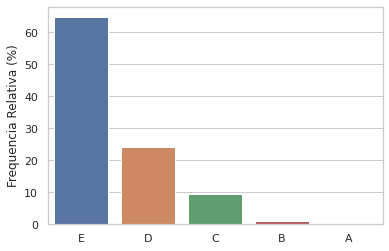

In [159]:
sns.set_theme(style='whitegrid')
tips = sns.load_dataset('tips')
ax= sns.barplot(x=labels, y=df['Frequencia Relativa (%)'])



> ### Conclusões

Escreva suas conclusões aqui...

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

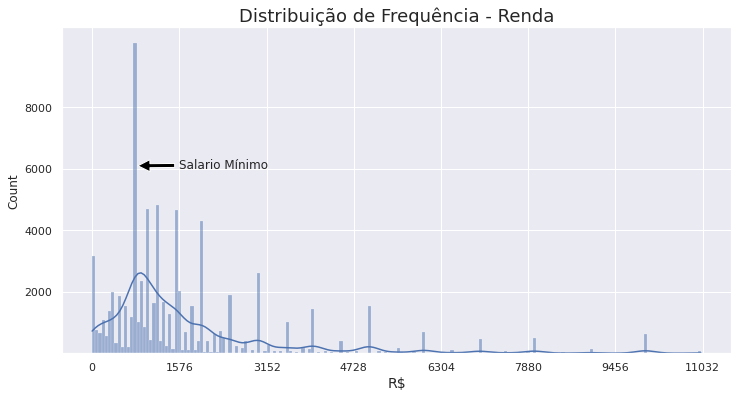

In [160]:
sns.set_theme(style="darkgrid")
ax = sns.histplot(dataset.query('Renda <= 11000').Renda, kde= True)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequência - Renda', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax.set_yticks([2000,4000,6000,8000])
ax.set_xticks([0,1576, 3152, 4728, 6304, 7880, 9456, 11032])
ax.annotate('Salario Mínimo', xy=(788, 6100), xytext=(1576, 6000),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
ax

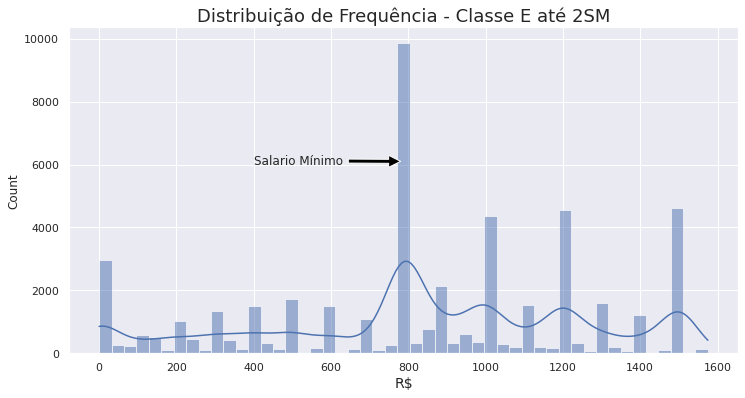

In [161]:
sns.set_theme(style="darkgrid")
ax = sns.histplot(dataset.query('Renda < 1576').Renda, kde= True,)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequência - Classe E até 2SM', fontsize=18)
ax.set_xlabel('R$', fontsize=14)


ax.annotate('Salario Mínimo', xy=(788, 6100), xytext=(400, 6000),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
ax

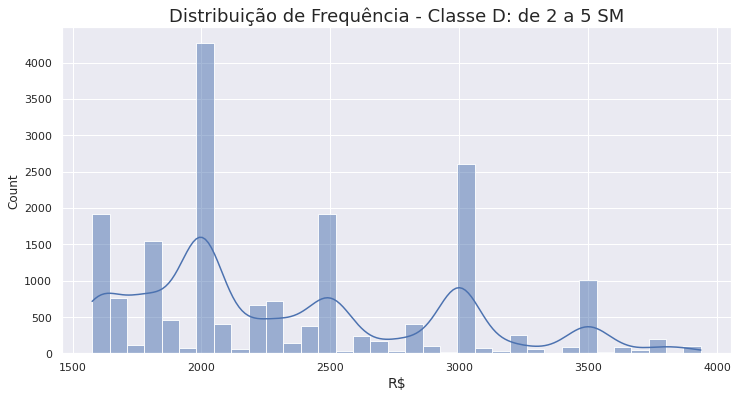

In [162]:
sns.set_theme(style="darkgrid")
ax = sns.histplot(dataset.query('Renda >= 1576 & Renda<3940').Renda, kde= True)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequência - Classe D: de 2 a 5 SM', fontsize=18)
ax.set_xlabel('R$', fontsize=14)

ax

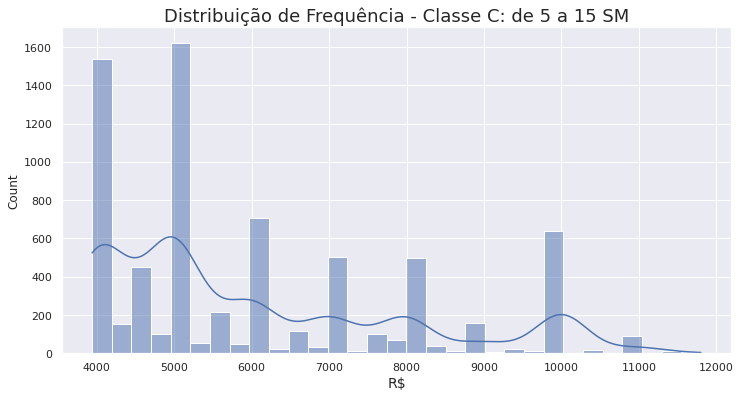

In [163]:
sns.set_theme(style="darkgrid")
ax = sns.histplot(dataset.query('Renda >= 3940 & Renda<11820').Renda, kde= True)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequência - Classe C: de 5 a 15 SM', fontsize=18)
ax.set_xlabel('R$', fontsize=14)

ax

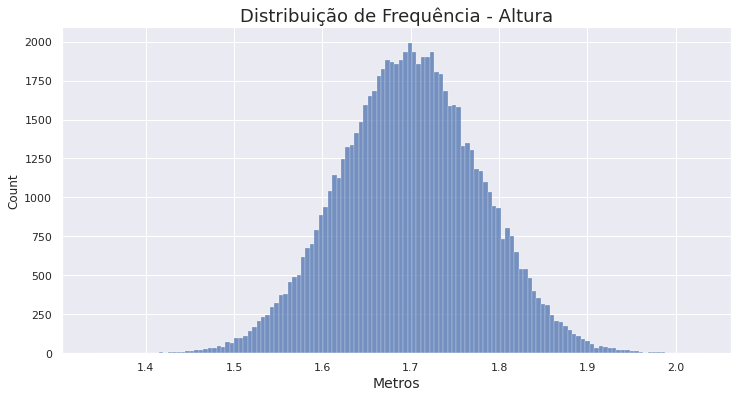

In [164]:
ax = sns.histplot(dataset.Altura, kde= False)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequência - Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

> ### Conclusões

* O histograma de renda apresenta assimetria a direita, mostrando maior concentração nas classes 'E' e 'D'

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

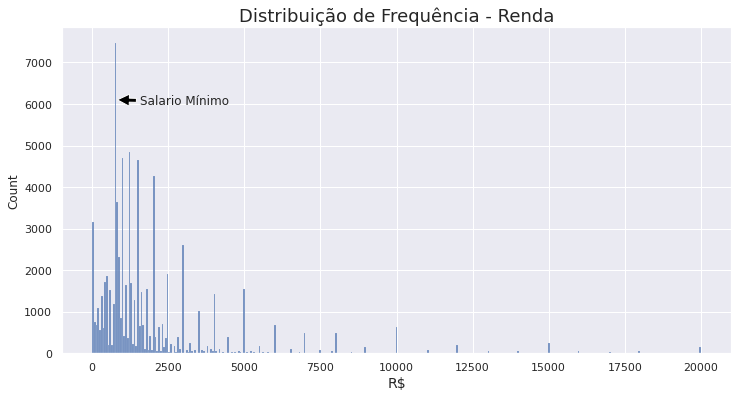

In [165]:
sns.set_theme(style="darkgrid")
ax = sns.histplot(dataset.query('Renda <= 20000').Renda, kde= False)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequência - Renda', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax.annotate('Salario Mínimo', xy=(788, 6100), xytext=(1576, 6000),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
ax

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [166]:
dataset.Cor.replace({
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}, inplace=True)

In [167]:
dataset.UF.replace({
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}, inplace = True)

In [168]:
dataset.Sexo.replace([0,1],['Masculino','Feminino'], inplace=True )

In [169]:
dataset['Anos de Estudo'].replace({
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
},inplace=True)

In [170]:
dataset.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,Rondônia,Masculino,23,Parda,11 anos,800,1.603808
1,Rondônia,Feminino,23,Branca,11 anos,1150,1.739790
2,Rondônia,Feminino,35,Parda,14 anos,880,1.760444
3,Rondônia,Masculino,46,Branca,5 anos,3500,1.783158
4,Rondônia,Feminino,47,Parda,8 anos,150,1.690631


In [171]:
agrupando_por_cor_frequencia = pd.value_counts(dataset.Cor)
agrupando_por_cor_frequencia

Parda       35925
Branca      31815
Preta        8391
Indígena      357
Amarela       352
Name: Cor, dtype: int64

In [172]:
agrupando_por_cor_percentual = pd.value_counts(dataset.Cor, normalize=True)
agrupando_por_cor_percentual

Parda       0.467530
Branca      0.414042
Preta       0.109201
Indígena    0.004646
Amarela     0.004581
Name: Cor, dtype: float64

In [173]:
agrupando_por_sexo_frequencia = pd.value_counts(dataset.Sexo)
agrupando_por_sexo_frequencia

Masculino    53250
Feminino     23590
Name: Sexo, dtype: int64

In [174]:
agrupando_por_sexo_percentual = pd.value_counts(dataset.Sexo, normalize=True)
agrupando_por_sexo_percentual

Masculino    0.692998
Feminino     0.307002
Name: Sexo, dtype: float64

In [175]:
pd.crosstab(dataset.Cor,dataset.Sexo)

Sexo,Feminino,Masculino
Cor,,
Amarela,117,235
Branca,9621,22194
Indígena,101,256
Parda,10862,25063
Preta,2889,5502


In [176]:
pd.crosstab(dataset.Cor, dataset.Sexo, normalize= True).round(4)

Sexo,Feminino,Masculino
Cor,,
Amarela,0.0015,0.0031
Branca,0.1252,0.2888
Indígena,0.0013,0.0033
Parda,0.1414,0.3262
Preta,0.0376,0.0716


> ### Conclusões
* 32% dos individos que responderam as perguntas são homens e de cor Parda
* os indígenas representam a menor fração nessa pesquisa


## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [177]:
dataset.Renda.mean()

2000.3831988547631

### Obtenha a mediana

In [178]:
dataset.Renda.median()

1200.0

### Obtenha a moda

In [179]:
dataset.Renda.mode()[0]

788

### Obtenha o desvio médio absoluto

In [180]:
dataset.Renda.mad()

1526.4951371644931

### Obtenha a variância

In [181]:
dataset.Renda.var()

11044906.00622118

### Obtenha o desvio-padrão

In [182]:
dataset.Renda.std()

3323.3877303470294

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [183]:
pd.crosstab(dataset.Sexo, dataset.Cor, aggfunc={'mean', 'median', 'max'}, values=dataset.Renda).round(2)

max                      ...   median                
Cor        Amarela    Branca  Indígena  ... Indígena   Parda   Preta
Sexo                                    ...                         
Feminino   20000.0  100000.0  120000.0  ...    788.0   800.0   800.0
Masculino  50000.0  200000.0   10000.0  ...    797.5  1200.0  1200.0

[2 rows x 15 columns]

> ### Conclusões

Escreva suas conclusões aqui...

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

In [184]:
condicao = dataset.query('Renda < 10000')

In [ ]:
sns.set_theme(style = 'darkgrid')
ax = sns.boxplot(y=dataset.Renda, x=dataset.Cor, hue=dataset.Sexo)
ax.figure.set_size_inches(16,8)
ax.set_title('Renda - Cor vs. Sexo\n', fontsize = 24)
ax.set_ylabel('Reais (R$)', fontsize = 16)
ax.set_yticks([(i+1)*788 for i in range(14)])
ax.axhline(788, ls='--')
ax.set_ybound(0,11032)

> ### Conclusões



*   A linha horizontal tracejada no gráfico  representa o valor do salário    mínimo (R$ 788,00)
*   Com exceção às mulheres de cor branca e amarela, as demais possuem a mediana exatamente, ou muito próximo da linha tracejada
*   Já os homens, apenas aqueles que declarados como indígenas, estão na faixa de um salário mínimo
*   As pessoas que se declararam como amarelas, estão acima de todas as outras classes de cor


*   75% dos homens que se declararam com cor Parda ou Preta, recebem mais de um salário mínimo. Esse percentual é maior naqueles grupos que se declararam de cor Branca ou Amarela.
*    As mulheres e homens amarelos superam os demais Grupos. Porém é o grupo que tem a menor frequência na base de dados


# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

In [ ]:
from scipy import stats


### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

> ### Conclusões

Escreva suas conclusões aqui...

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

> ### Conclusões

Escreva suas conclusões aqui...